
# Project: Analysis of Movie Data

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>The dataset that I will be using for this project is from The Movie Database (TMDb). This set of data includes data on over 10,000 movies from 1966 to 2015. The information covered ranges from the cast to budget and revenue information. Basically, most of what you would want to know about a movie from a statistics standpoint is covered here.

>In my data analysis I want to focus my first question on the movie budget. Specifically I want to know how having a higher (or lower) budget reflect on the revenue of the film?. I expect that the conclusions drawn from answering this question will lead me to having a better understating of what a movie’s. 

>Secondly, I am going to see what the average runtime for a movie is. I would like to know what the length of most movies ends up being. Also, I will take a look at a some of the outliers that have rather long or short runtimes. 


In [13]:
#Importing all packages 

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

>First off, I am going to create a dataset from the csv file and take a look at the data

In [3]:
# Creating the data frame using pandas
movie_data = pd.read_csv('tmdb-movies.csv') 

In [4]:
# Printing out first 5 rows of data
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [5]:
# Showing Dtypes of the columns
movie_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Displaying a summary of statistics for the movie data
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Checking which rows (True values) contain zeros
(movie_data == 0).any(axis=0)

id                      False
imdb_id                 False
popularity              False
budget                   True
revenue                  True
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                  True
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj               True
revenue_adj              True
dtype: bool

In [8]:
# Checking for missing values in each of the columns
movie_data.isnull().any(axis=0)

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### Data Cleaning 

>To start my data cleaning, I want to take out some of the data that I know I will not be needing. This will make things a little easier to visualize and work with.

In [9]:
# Removing un-needed columns
not_needed_data = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'cast', 'director', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average', 'release_year']
movie_data.drop(not_needed_data, axis=1, inplace=True)

# Showing updated table
movie_data.head()

,budget,revenue,original_title,runtime,genres,release_date
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/2015
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/2015
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/2015


>The only real issue that I could find with the movie data was the zeros that where entered all over the numerical columns. These likely are just indicating that the data was not available, however they need to be removed from the data frame. If I left these zeros in, they would likely lead to inaccurate results during my analysis

In [10]:
# Converting the zeros to be NaN
columns = ['budget','revenue','runtime']
movie_data[columns] = movie_data[columns].replace(0, np.nan)

# Deleting all the NaN rows
movie_data.dropna(subset = columns, inplace = True)
rows, col = movie_data.shape

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - How does having a higher or lower budget reflect on the revenue of the film?

>To start I want to see what the correlation is

In [11]:
# Finding Pearson's r with numpy
array = np.corrcoef(movie_data['budget'], y = movie_data['revenue'])
print(array[0,1])

0.688547677589


>It would appear that budget and revenue have a positive correlation of approximately 0.69. This indicates that as budget increase so will the revenue, in most cases. To visualize this, I will use a scatter plot. 

Text(0,0.5,'Revenue (USD)')

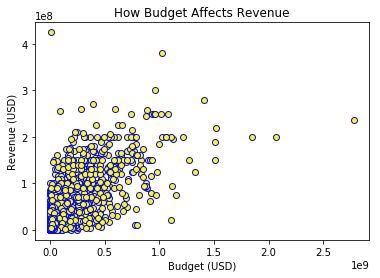

In [21]:
# Creating the scatter plot 
plt.scatter(movie_data['revenue'], movie_data['budget'], color ='yellow', edgecolor='blue')
z = np.polyfit(movie_data['revenue'], movie_data['budget'], 1)


# Defining titles of both axis and the scatter plot itself
plt.title('How Budget Affects Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')

>From the scatter plot I can tell that one movie made more than anything else and did so on a small budget. I will check to see what film this was.

In [22]:
movie_data.loc[movie_data['revenue'].idxmax(axis=1)]

budget                                            2.37e+08
revenue                                        2.78151e+09
original_title                                      Avatar
runtime                                                162
genres            Action|Adventure|Fantasy|Science Fiction
release_date                                    12/10/2009
Name: 1386, dtype: object

### Research Question 2  - On average, how long does a movie last?

>To answer this question all I need to do is take the mean of the runtime column.


In [23]:
movie_data['runtime'].mean()

109.21582360570687

>Now that I know what the average length is, I want to see how far away some of the outliers are.

In [24]:
# Observing the lowest and highest runtimes
np.sort(movie_data['runtime'])

array([  15.,   26.,   42., ...,  219.,  248.,  338.])

In [25]:
# Checking what movie had the 338 max runtime
movie_data.loc[movie_data['runtime'].idxmax(axis=1)]

budget                                 1.8e+07
revenue                                 871279
original_title                          Carlos
runtime                                    338
genres            Crime|Drama|Thriller|History
release_date                         5/19/2010
Name: 2107, dtype: object

In [26]:
# Checking what movie had the 15 min runtime
movie_data.loc[movie_data['runtime'].idxmin(axis=1)]

budget                                   10
revenue                                   5
original_title                  Kid's Story
runtime                                  15
genres            Science Fiction|Animation
release_date                       6/2/2003
Name: 5162, dtype: object

>Finally I want to visualize the distrubution of the runtimes. To do so I will use a histogram.

Text(0,0.5,'Number of Movies')

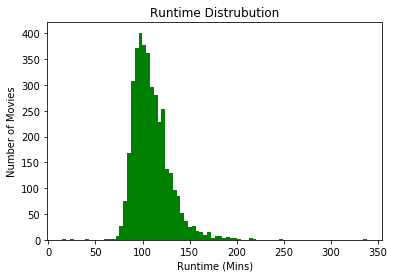

In [27]:
# Creating the histogram 
plt.hist(movie_data['runtime'], bins = 80, color = 'green', align = 'mid')

# Defining titles of both axis and the histogram itself
plt.title('Runtime Distrubution')
plt.xlabel('Runtime (Mins)')
plt.ylabel('Number of Movies')


<a id='conclusions'></a>
## Conclusions

>From my research I was able to do enough analysis that hinted at answers for both of my main questions. From my first question, it would appear that from my finding that as movie budget increases, so does the resulting revenue. This what I expected going into this, so it was nice to see that the data went along with what I was thinking. 

>My second question led me to find that the average runtime for a movie in this database was around 109 minutes. I thought this would be a little bit lower, but it was not an overly surprising discovery. On the other hand, the outliers for runtime where really surprising to me.

>While the analysis I did is useful in indicating the answers to my questions, it was not concert. The main reason that my answers cannot be 100% certain is the fact that this is nowhere near a complete list of movies. In fact, I can imagine that if the dataset included the thousands of low-budget indie out there, my results would have been different.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0